In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import kmeans_segmentation as kseg
%matplotlib inline

from skimage import feature, measure
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import label
from skimage.io import imread, imshow

In [2]:
image_name = "2015_09_10_700(10)_q015.tif"
mic = kseg.prepare_image(image_name)
mic.shape

(895, 1280)

In [3]:
from skimage.morphology import rectangle
from skimage.util.shape import view_as_windows
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity

In [4]:
# extract the top left part of original image and use a blur filter (gaussian kernel)
mic_s1 = mic[:200, :200].copy()
mic_s1 = gaussian(mic_s1, sigma=1.0)
# rescale intensities
mic_s1 = rescale_intensity(mic_s1, out_range=np.uint8)

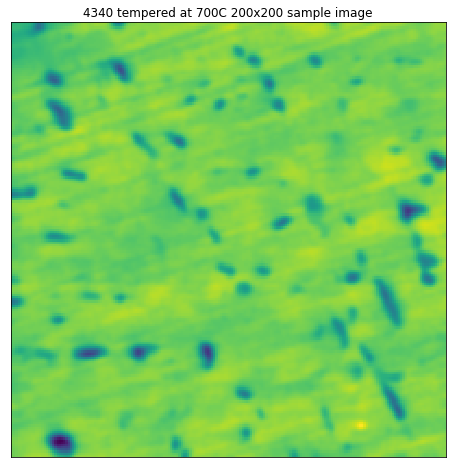

In [21]:
fig, ax = kseg.plot_single_image(mic_s1, cmap='viridis')
ax.set_title('4340 tempered at 700C 200x200 sample image')

In [8]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=10)
pca.fit(mic_s1)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
print(pca.explained_variance_ratio_)

[ 0.18056301  0.15131993  0.11003389  0.08458913  0.06707437  0.06148243
  0.04660085  0.03970631  0.034536    0.0292505 ]


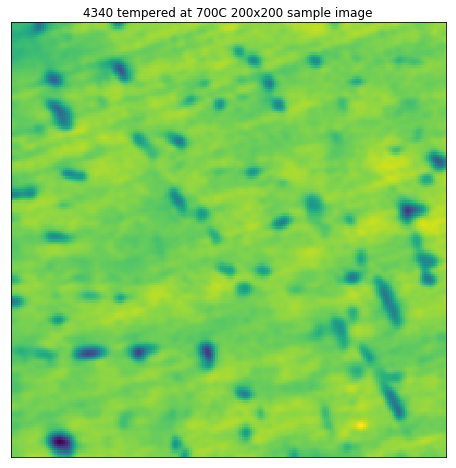

In [33]:
pca = PCA(n_components=36)
pca.fit(mic_s1)
tr_mic = pca.transform(mic_s1)
ig, ax = kseg.plot_single_image(pca.inverse_transform(tr_mic), cmap='viridis')
ax.set_title('4340 tempered at 700C 200x200 sample image')

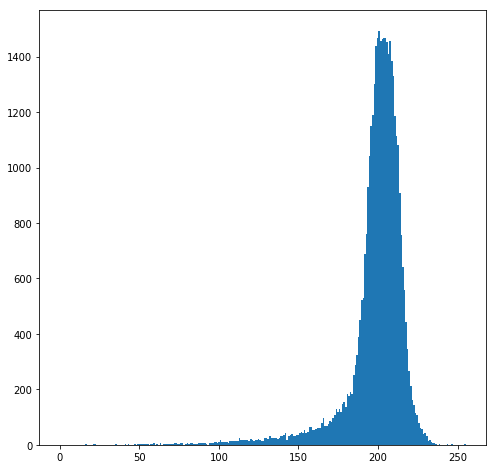

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
im_hist = ax.hist(mic_s1.ravel(), 256)

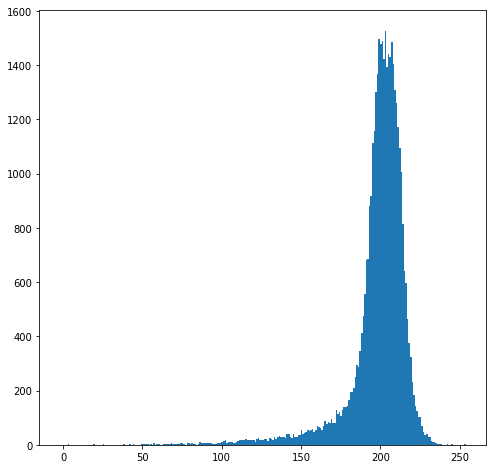

In [34]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
im_hist = ax.hist(pca.inverse_transform(tr_mic).ravel(), 256)

In [36]:
pca.explained_variance_ratio_.cumsum()

array([ 0.18056301,  0.33188294,  0.44191683,  0.52650596,  0.59358034,
        0.65506277,  0.70166362,  0.74136993,  0.77590593,  0.80515642,
        0.82889595,  0.85064974,  0.87000073,  0.88745745,  0.90254753,
        0.91459599,  0.92464401,  0.93349157,  0.94107225,  0.94738153,
        0.95324792,  0.95864469,  0.96310768,  0.9672613 ,  0.97115604,
        0.97454696,  0.97775101,  0.98054078,  0.98268476,  0.98455167,
        0.98622812,  0.98786794,  0.98937892,  0.99063546,  0.99176056,
        0.99283519])

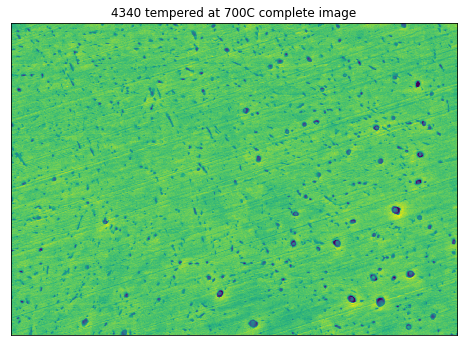

In [42]:
mic = rescale_intensity(mic, out_range=np.uint8)
ig, ax = kseg.plot_single_image(mic, cmap='viridis')
ax.set_title('4340 tempered at 700C complete image')

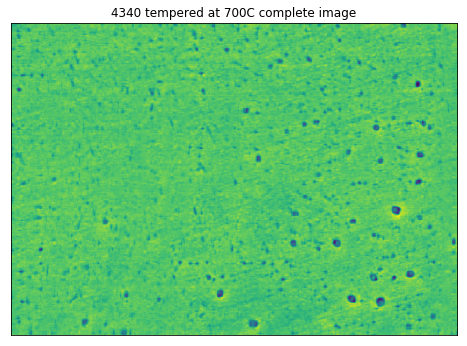

In [43]:
pca = PCA(n_components=50)
pca.fit(mic)
tr_mic = pca.transform(mic)
ig, ax = kseg.plot_single_image(pca.inverse_transform(tr_mic), cmap='viridis')
ax.set_title('4340 tempered at 700C complete image')

Results calculated: 16 clusters, 5 centroid initializations


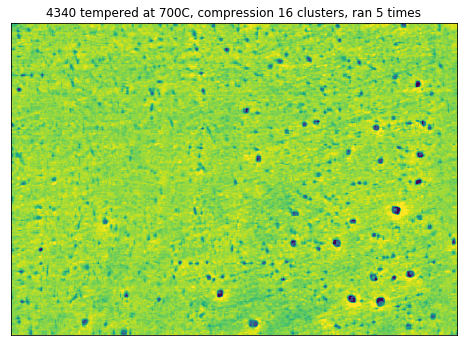

In [46]:
c_mic = pca.inverse_transform(tr_mic)
comp_mic_nc3 = kseg.k_means_segmentation(c_mic, n_clusters=16, n_init=5)
fig, ax = kseg.plot_single_image(comp_mic_nc3, cmap='viridis')
ax.set_title("4340 tempered at 700C, compression 16 clusters, ran 5 times")